In [54]:
import kagglehub
import os
import pandas as pd
import pandas as pd
import numpy as np

from sklearn import model_selection
from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
%matplotlib inline

# Download latest version
path = kagglehub.dataset_download("toramky/automobile-dataset")

csv = os.listdir(path)[0]
df = pd.read_csv(os.path.join(path, csv))
print(df.shape)
df.head()

(205, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


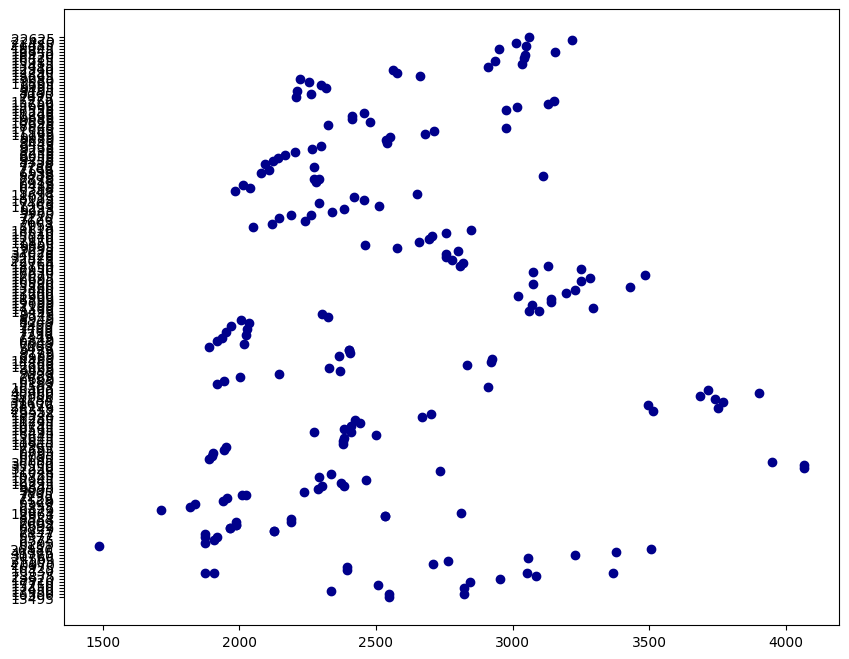

In [55]:
plt.figure(figsize= (10,8))
plt.scatter(df['curb-weight'], df.price, color = 'darkblue')

In [56]:
df = df[df['price'] != '?']
df['price'] = df['price'].astype(float)
df['price'] = df['price'].astype(int)

In [57]:
y = df['price']
X = df[['curb-weight']]

slr = LinearRegression()
slr.fit(X, y)


print(slr.intercept_)
print(slr.coef_)

-19553.570636227465
[12.818847]


Per one unit of price rises 12 euros. correlation doesnt equal causation.

In [58]:
cross_validate(slr, X, y, return_train_score=True, cv=4)

{'fit_time': array([0.00713873, 0.00259995, 0.01389503, 0.00483394]),
 'score_time': array([0.00237322, 0.00177717, 0.01050711, 0.01116419]),
 'test_score': array([0.76235577, 0.79964313, 0.26570483, 0.46261304]),
 'train_score': array([0.64428041, 0.63109658, 0.79559205, 0.70745481])}

In [59]:
cross_validate(slr, X, y, return_train_score=True, cv=4)['test_score'].mean()

0.5725791909814283

this means that curb weight accounts for 57% of price variance.

In [60]:
pred_price = slr.predict(X)
residus = pred_price - y
residus.describe()

count    2.010000e+02
mean     3.475084e-12
std      4.379925e+03
min     -2.068880e+04
25%     -1.379238e+03
50%      3.178613e+02
75%      2.037318e+03
max      1.153504e+04
Name: price, dtype: float64

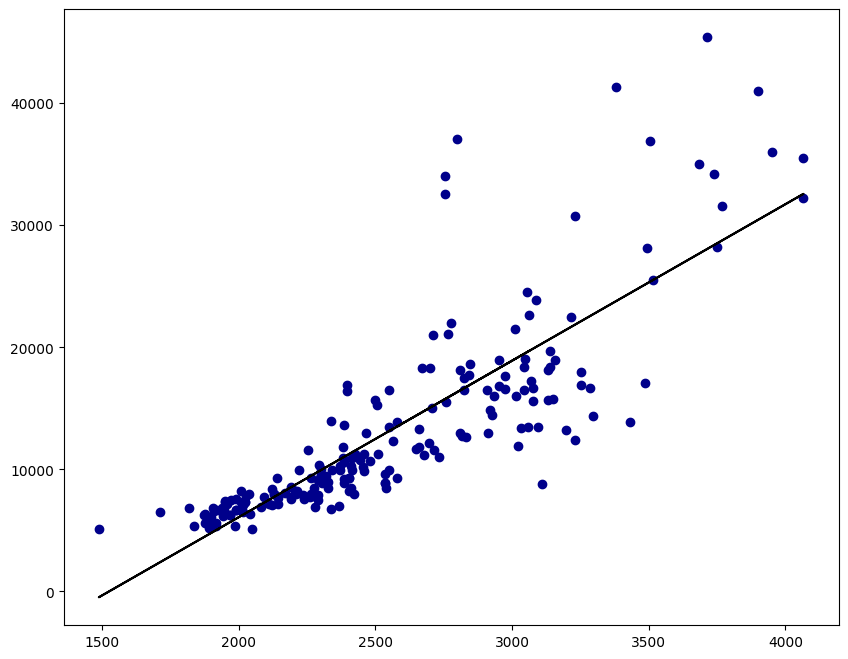

In [41]:
plt.figure(figsize= (10,8))
plt.scatter(X['curb-weight'], y, color = 'darkblue')
plt.plot(X, pred_price, color='k')

The regression line seems reasonably tight. A few points are further from the line, notably those with a high price, but the overall picture remains relatively correct.

Outliers can have a major influence on linear regression models: since the essence of regression is the minimization of squared residuals, large residuals have a disproportionate influence on the model. The straight line display helps us to detect influential outliers. In our graph, there appear to be no influential outliers.

As an example, to illustrate how influential an outlier can be, let's take the extreme case in which we add a single outlier to our DataFrame - a very light, very expensive car. We calculate a new regression model, and obtain the following line, much less well fitted to the data:

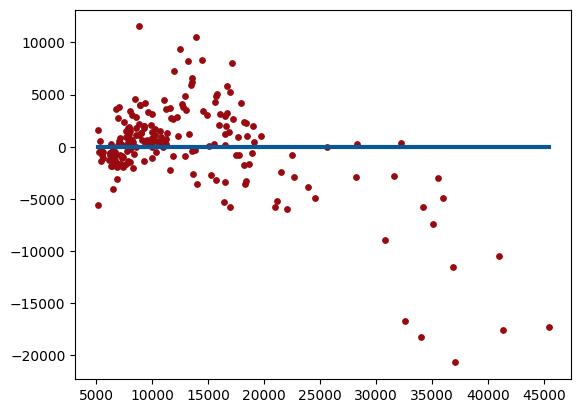

In [42]:
plt.scatter(y, residus, color='#980a10', s=15)
plt.plot((y.min(), y.max()), (0, 0), lw=3, color='#0a5798')

assumtions must  be centered (expectation equal to 0), of constant variance (homoscedasticity), independent and Gaussian.

((array([-2.70235077, -2.39300644, -2.21670641, -2.09047253, -1.99075721,
         -1.90762425, -1.83590295, -1.77254445, -1.71559368, -1.66371874,
         -1.61596971, -1.57164427, -1.53020786, -1.49124379, -1.45442067,
         -1.41947039, -1.38617282, -1.35434495, -1.32383285, -1.29450578,
         -1.26625169, -1.2389738 , -1.21258791, -1.18702027, -1.1622059 ,
         -1.13808725, -1.11461308, -1.09173755, -1.06941949, -1.04762177,
         -1.02631079, -1.005456  , -0.98502958, -0.96500611, -0.94536226,
         -0.92607659, -0.90712937, -0.88850233, -0.87017859, -0.85214246,
         -0.83437937, -0.81687572, -0.79961884, -0.78259687, -0.76579869,
         -0.74921388, -0.73283263, -0.71664571, -0.70064443, -0.68482057,
         -0.66916635, -0.65367443, -0.63833783, -0.62314992, -0.60810442,
         -0.59319534, -0.57841696, -0.56376385, -0.5492308 , -0.53481284,
         -0.52050522, -0.50630336, -0.49220289, -0.47819962, -0.4642895 ,
         -0.45046865, -0.43673331, -0.

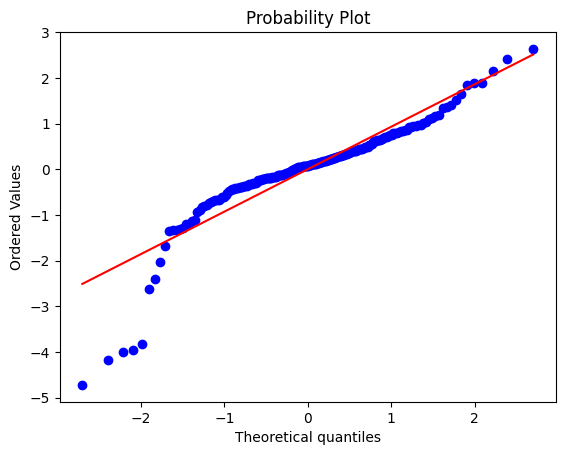

In [43]:
import scipy.stats as stats

residus_norm = (residus-residus.mean()) / residus.std()
stats.probplot(residus_norm, plot=plt)

https://www.datacamp.com/tutorial/qq-plot

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Assuming the model and data are already defined in the notebook
# Using the existing data and model from the notebook

standardized_residuals = (residus - residus.mean()) / residus.std()
influence = sm.OLS(y, sm.add_constant(X)).fit().get_influence()
cooks_d = influence.cooks_distance[0]
leverage = influence.hat_matrix_diag

# Fitted Values vs Residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted_values, y=residus, color='#203147')
plt.axhline(0, linestyle='dashed', color='#01ef63', linewidth=1)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Cars in Jordan")
plt.suptitle("Fitted Values vs Residuals")
plt.show()

# Histogram of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residus, color='#01ef63', bins=30)
plt.xlabel("Residuals")
plt.title("Cars in Jordan")
plt.suptitle("Histogram of Residuals")
plt.show()

# Scale-Location
plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted_values, y=np.sqrt(np.abs(standardized_residuals)), color='#203147')
sns.lineplot(x=fitted_values, y=np.sqrt(np.abs(standardized_residuals)), color='#01ef63')
plt.xlabel("Fitted Value")
plt.ylabel("Sqrt(|Standardized residuals|)")
plt.title("Cars in Jordan")
plt.suptitle("Scale-Location")
plt.show()

# Leverage vs Standardized Residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=leverage, y=standardized_residuals, size=cooks_d, color='#203147', sizes=(20, 200))
sns.lineplot(x=leverage, y=standardized_residuals, color='#01ef63')
plt.xlabel("Leverage")
plt.ylabel("Standardized Residuals")
plt.title("Cars in Jordan")
plt.suptitle("Residuals vs Leverage")
plt.show()

# Observation Number vs Cook's Distance
plt.figure(figsize=(8, 6))
sns.barplot(x=np.arange(len(cooks_d)), y=cooks_d, color='#01ef63')
plt.xlabel("Obs. Number")
plt.ylabel("Cook's Distance")
plt.title("Cars in Jordan")
plt.suptitle("Cook's Distance")
plt.show()

# Leverage vs Cook's Distance
plt.figure(figsize=(8, 6))
sns.scatterplot(x=leverage, y=cooks_d)
sns.lineplot(x=leverage, y=cooks_d, color='#01ef63')
plt.xlabel("Leverage hii")
plt.ylabel("Cook's Distance")
plt.title("Cars in Jordan")
plt.suptitle("Cook's dist vs Leverage hii/(1-hii)")
for slope in np.arange(0, 3.5, 0.5):
    plt.plot(leverage, slope * leverage, linestyle='dotdash', color='gray')
plt.show()

ValueError: array length 100 does not match index length 201

<Figure size 800x600 with 0 Axes>

In [62]:
from sklearn.feature_selection import f_regression

print('F-score:', f_regression(X, y)[0], 'p-value :', f_regression(X, y)[1])

F-score: [456.13885828] p-value : [2.18957724e-53]


In [63]:
print('p-value:', f_regression(X, y)[1])

p-value: [2.18957724e-53]


we reject null

In [64]:
# ... existing code ...
# Ensure X has the correct number of features for prediction

pred_price = slr.predict(X)
y = y[:len(pred_price)]

def rmse(predictions, targets):
    if len(predictions) != len(targets):
        raise ValueError("Predictions and targets must have the same length.")
    return np.sqrt(((predictions - targets) ** 2).mean())
rmse(pred_price, y)


/var/folders/xh/2_ykktld4lz_4rb5ny5cphk40000gn/T/ipykernel_18355/119534475.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y = y[:len(pred_price)]


4369.016310995779